#  Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


### Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### План предобработке:
- Фильтрация и очистка данных от ошибок и дубликатов
- Нормализация данных для удобства анализа
- Определение рыночной стоимости недвижимости с помощью методов оценки

## Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t',decimal=',')#Читаем файл

In [3]:
data.head(20)#Смотрим первые строки дс

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.duplicated().sum()#Проверяем на явные дубликаты

0

In [5]:
data.info()#Смотри общую инфу по дс

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Видим что в датасете есть 12 колонок с пропусками

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

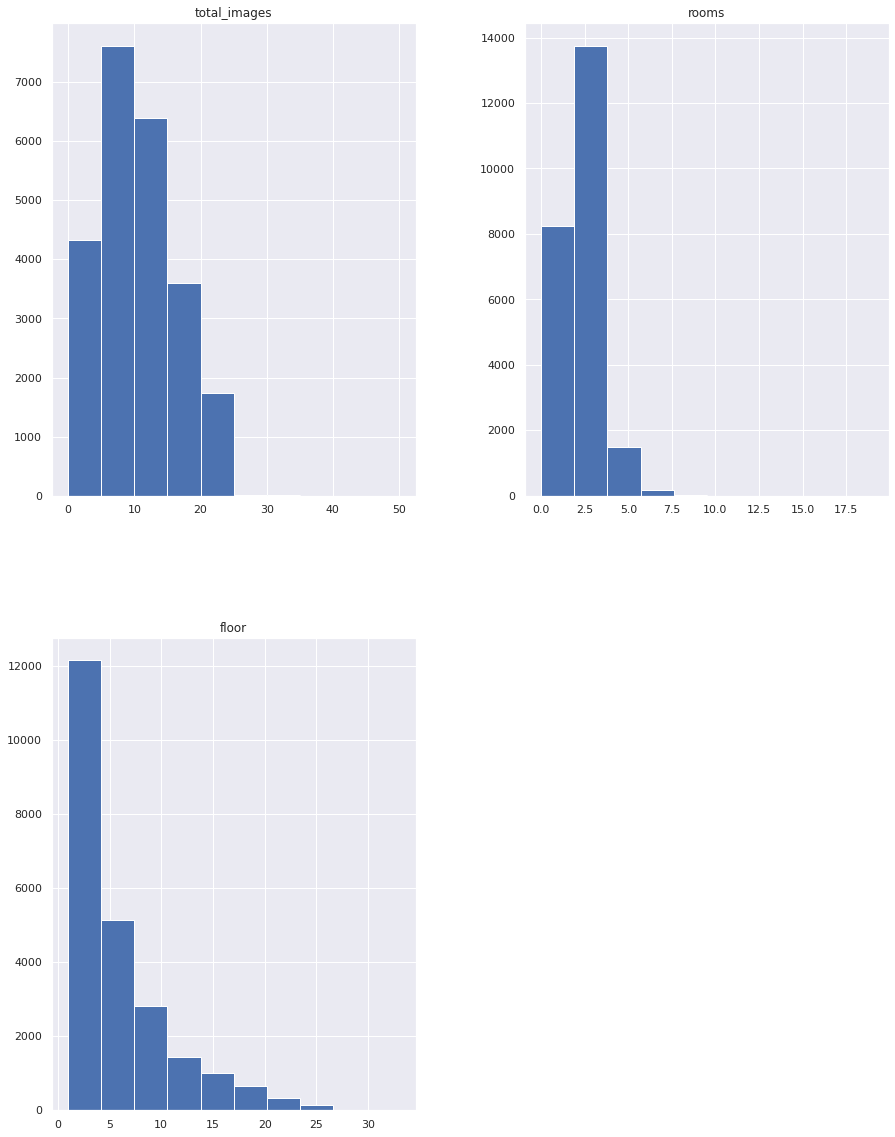

In [6]:
data.hist(figsize=(15,20))

Вывод:

В данных есть 12 колонок с пропущенными значениями, стоит так же обратит внимание на формат некоторых колонок. По гистограммам видно что как правило к обьявлению прикладывается порядком 8-10 изображений, в большей массе обьявления о продаже 2-ух комнатных квартир. Большую часть обьявлений составляют квартиры с 1 по 5 этаж.

## Предобработка данных

### Необходимые действия:
1. Собрать данные из различных источников, таких как сайты объявлений о недвижимости, государственные базы данных и т.д.
2. Провести предварительную обработку данных, включая удаление дубликатов, проверку на ошибки и преобразование в единый формат.
3. Разделить данные.
4. Использовать статистические методы, такие как корреляционный анализ, регрессионный анализ и кластерный анализ, для выявления закономерностей и связей между различными параметрами недвижимости.

Меняем типы даных которые в этом нуждаются

In [7]:
data['last_price'] = data['last_price'].astype('float') # меняем тип
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') # меняем формат 
data = data.dropna(subset=['floors_total','locality_name']) #удаляем строки с пропусками.
data['floors_total'] = data['floors_total'].astype('float').astype('int')

- Изменили тип данных либо формат записи по столбцам: Последняя цена, День выставления обьявления

- Удалили пропуски в колонке итого этажей

In [8]:
data.isna().sum() #определяем кол-во пропущеные значения в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

12 

Всего колонок с пропущенными значениями 12

In [9]:
data['balcony'] =data['balcony'].fillna(0).astype('float').astype(int) #присваеваем пропущенным значениям 0 и меняем тип на float
data['balcony'].isna().sum() #проверяем кол-во провущеных значений в колонке

0

Вывод: Меняем количество пропущенных балконов на ноль, можем связать отсутствие этих значением с тем что люди без балкона, не обращали внимание на данный пункт

In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)#заменияем пролпущеные значения на false
data['is_apartment'].isna().sum()

0

Вывод: Можем предположить что человек не обращал внимание на аппартаменты если его квартира не относилась к ним

In [12]:
data['ceiling_height'].unique()#смотрим уникальные значения в высоте потолка

array(['2.7', nan, '3.03', '2.5', '2.67', '2.56', '3.05', '2.75', '2.6',
       '2.9', '2.8', '2.55', '3.0', '2.65', '3.2', '2.61', '3.25', '3.45',
       '2.77', '2.85', '2.64', '2.57', '4.15', '3.5', '3.3', '2.71',
       '4.0', '2.47', '2.73', '2.84', '3.1', '2.34', '3.4', '3.06',
       '2.72', '2.54', '2.51', '2.78', '2.76', '25.0', '2.58', '3.7',
       '2.52', '5.2', '2.87', '2.66', '2.59', '2.0', '2.45', '3.6',
       '2.92', '3.11', '3.13', '3.8', '3.15', '3.55', '3.16', '3.62',
       '3.12', '2.53', '2.74', '2.96', '2.46', '5.3', '5.0', '2.79',
       '2.95', '4.06', '2.94', '3.82', '3.54', '3.53', '2.83', '4.7',
       '2.4', '3.38', '3.01', '5.6', '3.65', '3.9', '3.18', '3.35', '2.3',
       '3.57', '2.48', '2.62', '2.82', '3.98', '2.63', '3.83', '3.52',
       '3.95', '3.75', '2.88', '3.67', '3.87', '3.66', '3.85', '3.86',
       '4.19', '3.24', '4.8', '4.5', '4.2', '3.36', '32.0', '3.08',
       '3.68', '3.07', '3.37', '3.09', '8.0', '3.26', '3.34', '2.81',
       '3.44'

In [13]:
def correct_height(x):
    if x > 15:
        return x/10
    else:
        return x

In [14]:
import numpy as np

In [15]:
data['ceiling_height'] = data['ceiling_height'].astype('float')
data['ceiling_height'] = np.where(data['ceiling_height'] > 15,
                                 data['ceiling_height']/10,
                                 data['ceiling_height'])

In [ ]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data['ceiling_height'] / 10

In [16]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data[(data['ceiling_height']>= 2)&(data['ceiling_height']<=8)]
data['ceiling_height'].isna().sum()

0

Вывод: Обратим внимание на значения которые явно указанны не в тех единицах измерения, преведем к единообразию, отбросим те значения что выбиваются из нормы

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'].nunique()

364

In [19]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')#заменяем написание
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('деревня','посёлок')
data['locality_name'] = data['locality_name'].str.replace('село','посёлок')


In [20]:
data['locality_name'].nunique()

315

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'посёлок Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'посёлок Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'посёлок Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'посёлок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'посёлок Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'посёлок Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'посёлок Старая',
       'посёлок Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'посёлок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зел

Вывод: После удаления не явных дубликатов в назввнии локации, у нас осталось 315 уникальных значений

In [22]:
data['living_area'] = data['living_area'].astype('float')

In [23]:
data['kitchen_area'] = data['kitchen_area'].astype('float') # меняем тип
data['total_area'] = data['total_area'].astype('float') # меняем тип

procent_kitchen = (data['kitchen_area']/(data['total_area'])).median()
procent_living = (data['living_area']/(data['total_area'])).median() 

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*procent_kitchen)
data['living_area'] = data['living_area'].fillna(data['total_area']*procent_living)

Вывод: Заполняем отсутствующие значения медианным соотношением необх.площади к общей

In [24]:
data['ponds_around3000'] = data['ponds_around3000'].fillna('0').astype('float')
data['parks_around3000'] = data['parks_around3000'].fillna('0').astype('float')
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('float')
data['airports_nearest'] = data['airports_nearest'].astype('float')
data['parks_nearest']=data['parks_nearest'].astype('float')
data['ponds_nearest']=data['ponds_nearest'].astype('float')
data['days_exposition']=data['days_exposition'].astype('float')

Вывод пропущеные значения в кол-ве парков и прудов заполняем 0 значвениями

### Общий вывод по предобработке:
- Изменили тип данных либо формат записи по столбцам: Последняя цена, День выставления обьявления
- Удалили пропуски в колонке итого этажей
- Всего колонок с пропущенными значениями 12
- Заменили количество пропущенных балконов на ноль, можем связать отсутствие этих значением с тем что люди без балкона, не обращали внимание на данный пункт
- Заполнили, пропуски в столбце аппартаменты. Можем предположить что человек не обращал внимание на аппартаменты если его квартира не относилась к ним.
- Обратили внимание на значения которые явно указанны не в тех единицах измерения, преведем к единообразию, отбросим те значения что выбиваются из нормы
- В столбце с именем локации, были неявные дубликаты, привели к единообразию названий
- Заполнели отсутствующие значения медианным соотношением необх.площади к общей
- Пропущеные значения в кол-ве парков в радиусе 3-ех км и прудов заполняем 0 значвениями

## Посчитаем и добавим в таблицу новые столбцы

In [25]:
data['price_one_meter'] = (data['last_price']/data['total_area']).astype('int') #добавляем столбец с ценной квадратного метра
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

Добавили в таблицу столбцы День, Месяц, Год публикации

In [27]:
conditions = [
    data['floor'] == 1,
    data['floor'] == data['floors_total'],
    data['floor'] == data['floor']
]
choices = [
    'первый',
    'последний',
    'другой'
]
data['floor_type'] = np.select(conditions, choices, default='Not satisfied')

In [28]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,publication_day,publication_month,publication_year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.349876,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,0.0,NaN,0.0,NaN,55.0,95065,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.685856,22,False,...,0.0,NaN,0.0,NaN,NaN,110544,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,0.0,NaN,0.0,NaN,189.0,87454,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой


Добавили в таблицу столбец с категорией по этажам

In [29]:
data['cityCenters_nearest_km']=(data['cityCenters_nearest'].astype('float'))//1000

Добавили в таблицу столбец растояние до центра в км

In [30]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,publication_day,publication_month,publication_year,cityCenters_nearest_km
count,23558.000000,2.355800e+04,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,23558.000000,...,23558.000000,8027.000000,23558.000000,9031.000000,20387.000000,2.355800e+04,23558.000000,23558.000000,23558.000000,18058.000000
mean,9.877749,6.540170e+06,60.327623,2.070846,2.697572,10.674718,34.581102,5.877664,10.485974,0.593514,...,0.468758,490.644699,0.589609,518.414572,180.763428,9.938445e+04,2.567451,6.401053,2017.370957,13.696533
std,5.680241,1.091235e+07,35.660880,1.078660,0.229392,6.593003,22.362590,4.871440,6.027590,0.960295,...,0.748348,341.616139,0.883702,277.987564,219.757256,5.028905e+04,1.788331,3.493223,1.037506,8.617630
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,7.656300e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.645000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.142120e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.000000


### Общий вывод по добавлениям новых столбцов:
- Добавили в таблицу столбцы День, Месяц, Год публикации
- Добавили в таблицу столбец с категорией по этажам
- Добавили в таблицу столбец растояние до центра в км

## Проведите исследовательский анализ данных

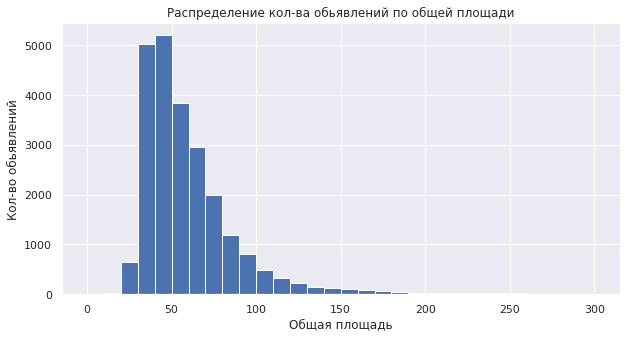

In [31]:
data['total_area'].hist(bins=30,range=(0,300),figsize=(10,5))
plt.xlabel('Общая площадь')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по общей площади')
plt.show()

In [32]:
data['total_area'].describe()

count    23558.000000
mean        60.327623
std         35.660880
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

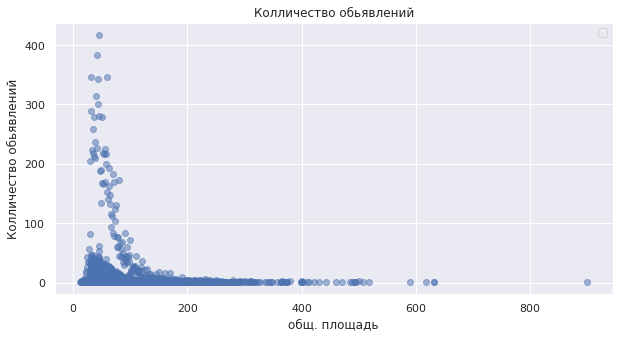

In [33]:
pd.pivot_table(data,
               index=['total_area'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.5)

plt.title('Колличество обьявлений')
plt.xlabel('общ. площадь')
plt.legend('')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью  50 кв.м.

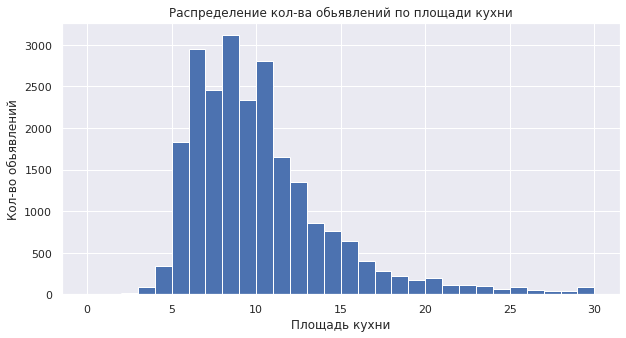

In [34]:
data['kitchen_area'].hist(bins=30,range=(0,30),figsize=(10,5))
plt.xlabel('Площадь кухни')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по площади кухни')
plt.show()

In [35]:
data['kitchen_area'].describe()

count    23558.000000
mean        10.485974
std          6.027590
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

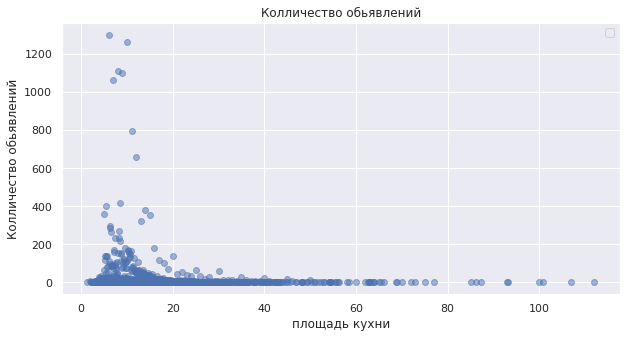

In [36]:
pd.pivot_table(data,
               index=['kitchen_area'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.5)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('площадь кухни')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью кухни  по 7, 9, 10 метров.

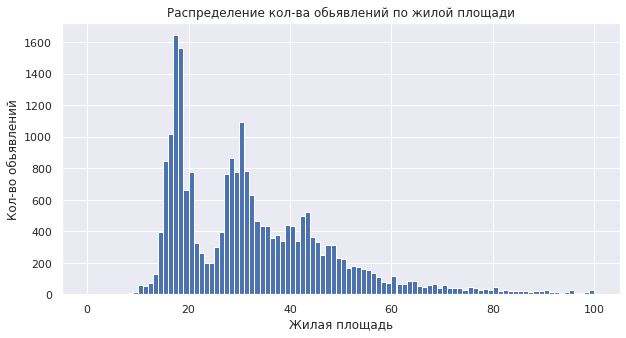

In [37]:
data['living_area'].hist(bins=100,range=(0,100),figsize=(10,5))
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по жилой площади')
plt.show()

In [38]:
data['living_area'].describe()

count    23558.000000
mean        34.581102
std         22.362590
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

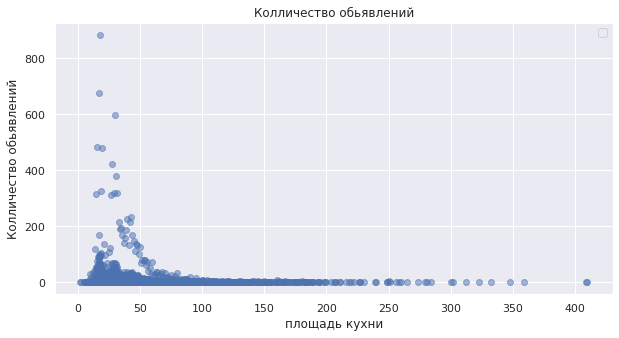

In [39]:
pd.pivot_table(data,
               index=['living_area'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.5)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('площадь кухни')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры с жилой площадью около 30 кв.м.

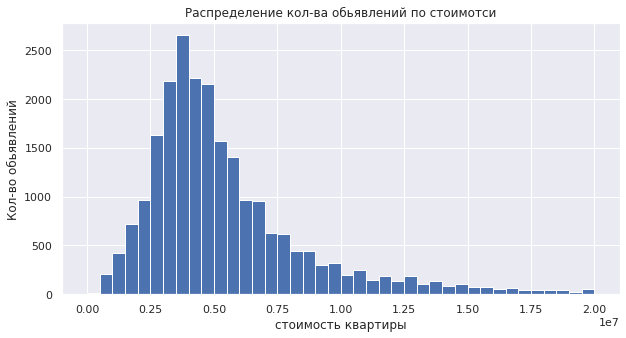

In [40]:
data['last_price'].hist(bins=40, range=(0,20000000), figsize = (10,5))
plt.xlabel('стоимость квартиры')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по стоимотси')
plt.show()


In [41]:
data['last_price'].describe()

count    2.355800e+04
mean     6.540170e+06
std      1.091235e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.645000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

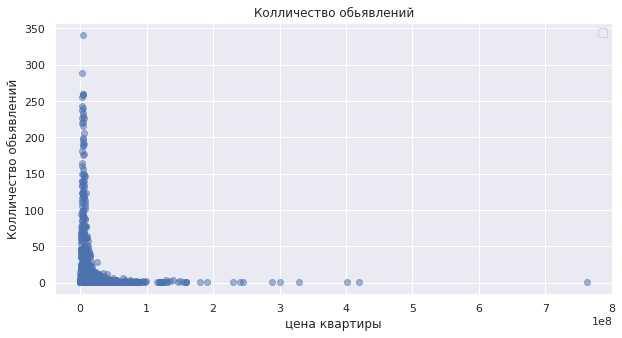

In [42]:
pd.pivot_table(data,
               index=['last_price'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.5)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('цена квартиры')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры по цене примерно в 4,8 миллиона рублей.

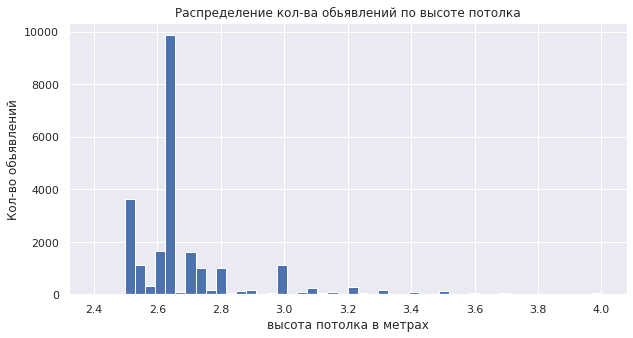

In [43]:
data['ceiling_height'].hist(bins=50, range=(2.4,4), figsize = (10,5))
plt.xlabel('высота потолка в метрах')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по высоте потолка')
plt.show()

In [44]:
data['ceiling_height'].describe()

count    23558.000000
mean         2.697572
std          0.229392
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

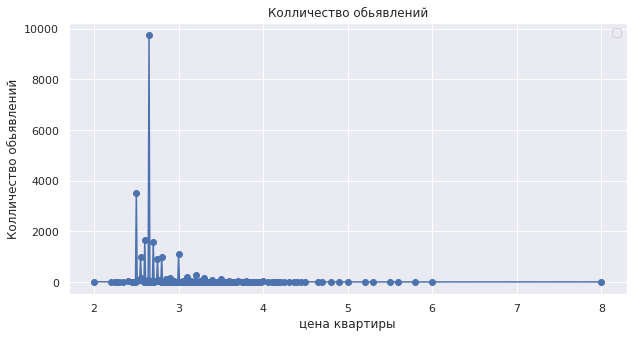

In [45]:
pd.pivot_table(data,
               index=['ceiling_height'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=1)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('цена квартиры')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры с высотой потолка 2,65 м.

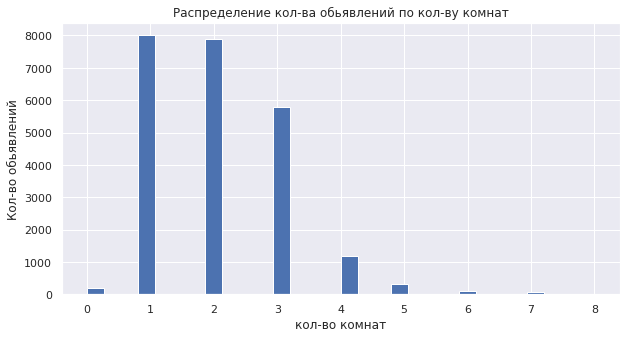

In [46]:
data['rooms'].hist(bins=30, range=(0,8),figsize = (10,5))
plt.xlabel('кол-во комнат')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по кол-ву комнат')
plt.show()

In [47]:
data['rooms'].describe()

count    23558.000000
mean         2.070846
std          1.078660
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

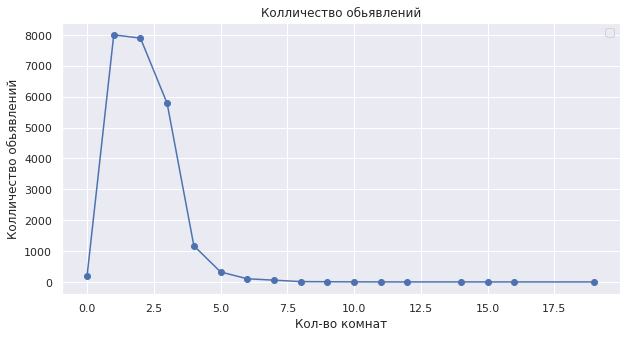

In [48]:
pd.pivot_table(data,
               index=['rooms'],
               values=['floor'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=1)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Кол-во комнат')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры формата 1-но и 2-ух комнатных.

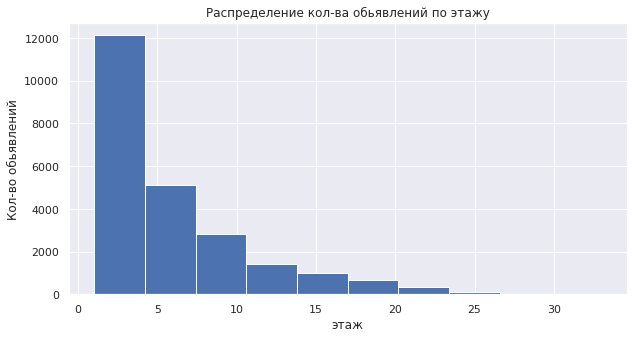

In [49]:
data['floor'].hist(bins=10,figsize = (10,5))
plt.xlabel('этаж')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по этажу')
plt.show()

In [50]:
data['floor'].describe()

count    23558.000000
mean         5.877664
std          4.871440
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

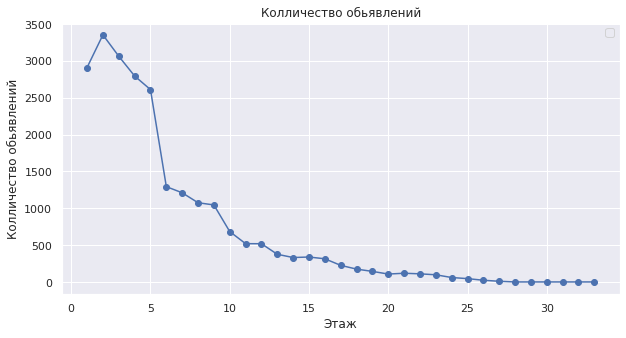

In [51]:
pd.pivot_table(data,
               index=['floor'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=1)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Этаж')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры с 1-го по 4-ый этаж

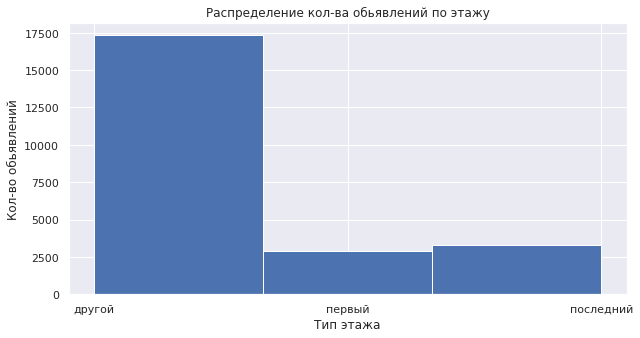

In [52]:
data['floor_type'].hist(bins=3,figsize = (10,5))
plt.xlabel('Тип этажа')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по этажу')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры не представленые на 1 и последнем этажах

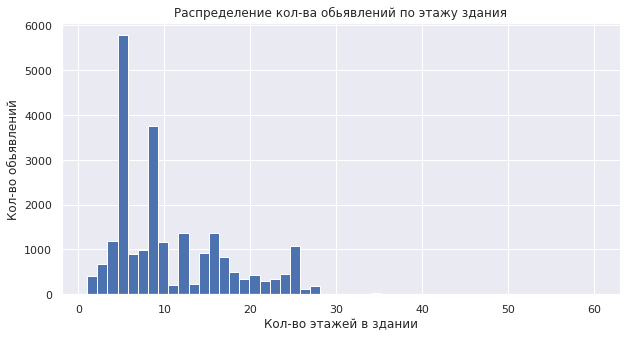

In [53]:
data['floors_total'].hist(bins=50,figsize = (10,5))
plt.xlabel('Кол-во этажей в здании')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по этажу здания')
plt.show()

In [54]:
data['floors_total'].describe()

count    23558.000000
mean        10.674718
std          6.593003
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

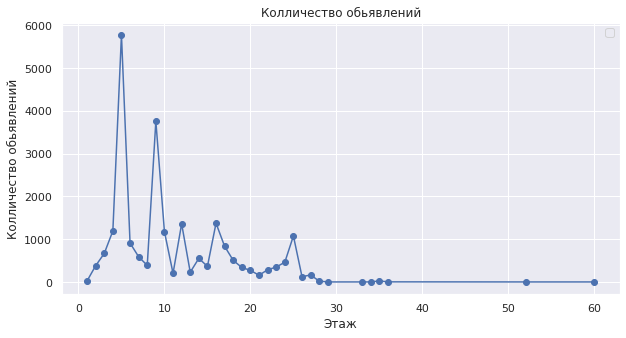

In [55]:
pd.pivot_table(data,
               index=['floors_total'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=1)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Этаж')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры в домах этажностью в 5 и 9 этажей.

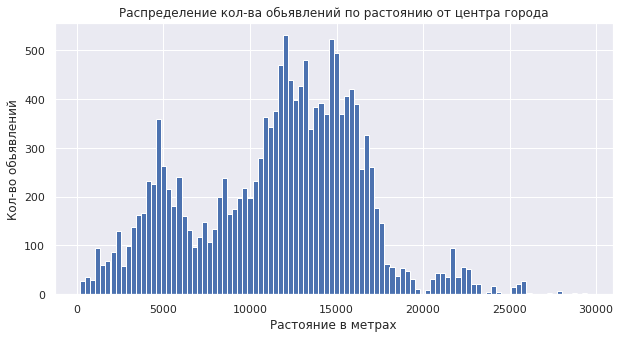

In [56]:
city_center = data[data['locality_name']=='Санкт-Петербург']
city_center['cityCenters_nearest'].hist(bins=100, figsize = (10,5))
plt.xlabel('Растояние в метрах')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по растоянию от центра города')
plt.show()

In [57]:
city_center['cityCenters_nearest'].describe()

count    15585.000000
mean     11587.870132
std       4832.613510
min        181.000000
25%       8322.000000
50%      12242.000000
75%      14939.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

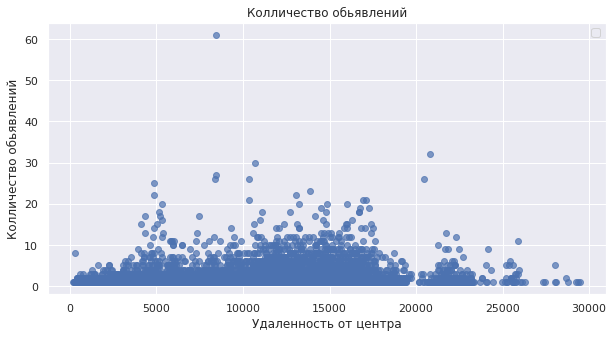

In [58]:
pd.pivot_table(city_center,
               index=['cityCenters_nearest'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.7)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Удаленность от центра')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры со средней удаленостью 10 км от центра города.

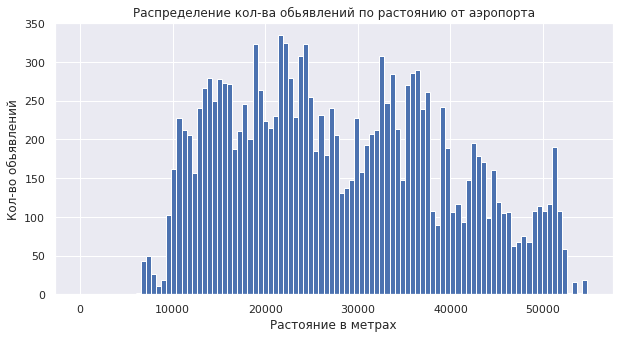

In [59]:
city_center['airports_nearest'].hist(bins=100, figsize = (10,5))
plt.xlabel('Растояние в метрах')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по растоянию от аэропорта')
plt.show()

In [60]:
city_center['airports_nearest'].describe()

count    15561.000000
mean     28041.390656
std      11549.479118
min          0.000000
25%      18576.000000
50%      26763.000000
75%      36587.000000
max      54784.000000
Name: airports_nearest, dtype: float64

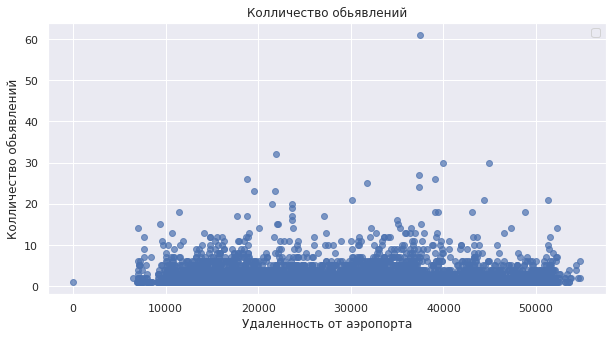

In [61]:
pd.pivot_table(city_center,
               index=['airports_nearest'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='o', figsize=(10, 5), alpha=0.7)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Удаленность от аэропорта')
plt.ylabel('Колличество обьявлений')
plt.show()

- Самыми широкопредставленными обьявлениями о продаже являются квартиры удаленные от аэропорта на растояние 28 км.

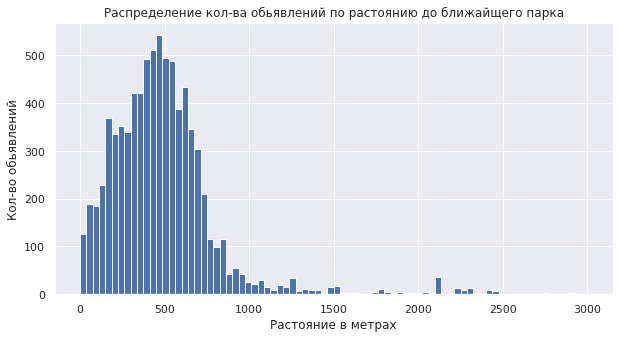

In [62]:
park_dist = data.query('parks_around3000 != "0"')
park_dist['parks_nearest'].hist(bins=80, figsize=(10,5), range=(0,3000))
plt.xlabel('Растояние в метрах')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по растоянию до ближайщего парка')
plt.show()

In [63]:
data['parks_nearest'].describe()

count    8027.000000
mean      490.644699
std       341.616139
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

- Самыми широкопредставленными обьявлениями о продаже являются квартиры около которых есть парки, растояние составит приерно 500 метров.

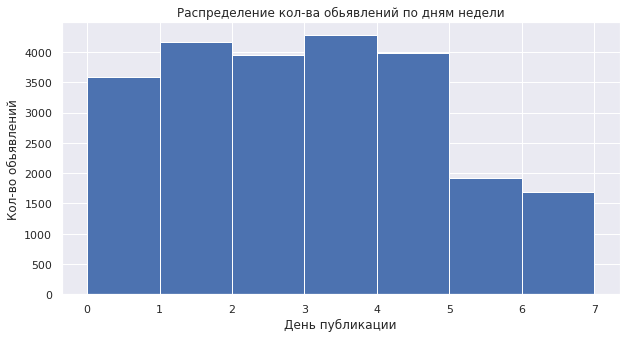

In [64]:
data['publication_day'].hist(bins=7, range=(0,7),figsize = (10,5))
plt.xlabel('День публикации')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по дням недели')
plt.show()

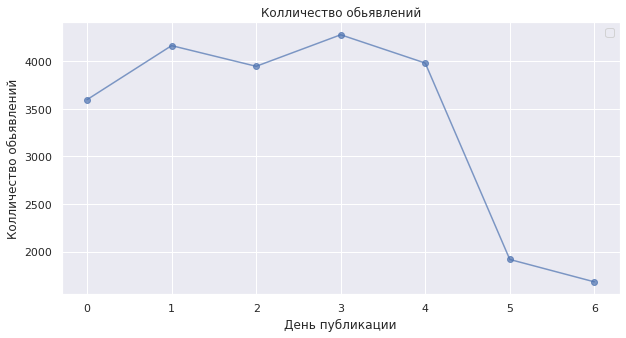

In [65]:
pd.pivot_table(data,
               index=['publication_day'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=0.7)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('День публикации')
plt.ylabel('Колличество обьявлений')
plt.show()

- Наиболее активно публикации обьявлений происходят в буднии дни

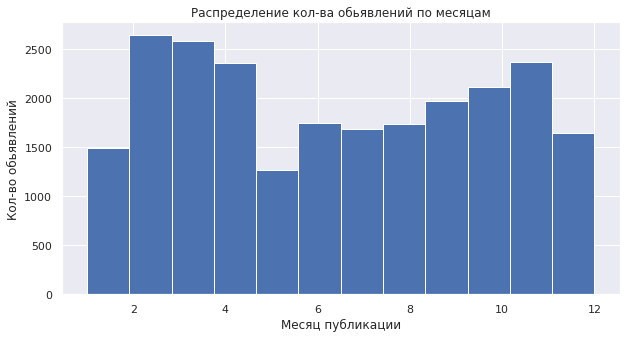

In [66]:
data['publication_month'].hist(bins=12, range = (1,12),figsize = (10,5))
plt.xlabel('Месяц публикации')
plt.ylabel('Кол-во обьявлений')
plt.title('Распределение кол-ва обьявлений по месяцам')
plt.show()

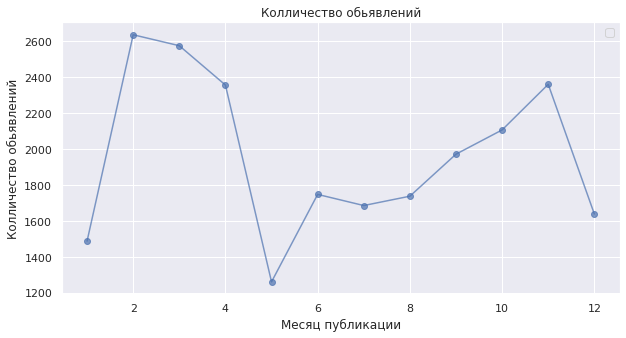

In [67]:
pd.pivot_table(data,
               index=['publication_month'],
               values=['rooms'],
               aggfunc=len).plot(grid=True, 
                                 style='-o', figsize=(10, 5), alpha=0.7)

plt.title('Колличество обьявлений')
plt.legend('')
plt.xlabel('Месяц публикации')
plt.ylabel('Колличество обьявлений')
plt.show()

- Наибольшая активность по публикация обьявлений является раняя  весна и ноябрь 

### Общий вывод по кол-ву публикаций:
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью от 40 до 50 кв.м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью кухни  по 7, 9, 10 метров.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с жилой площадью около 30 кв.м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры по цене примерно в 4.8 миллиона рублей.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с высотой потолка 2,65 м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры формата 1-ой и 2-ух комнатных.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с 1-го по 4-ый этаж
- Самыми широкопредставленными обьявлениями о продаже являются квартиры не представленые на 1 и последнем этажах
- Самыми широкопредставленными обьявлениями о продаже являются квартиры в 5-ти и 9-ти этажных домах.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры со средней удаленостью 10-15 км от центра города.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры удаленные от аэропорта на растояние 28 км.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры около которых есть парки, растояние составит приерно 500 метров.
- Наиболее активно публикации обьявлений происходят в буднии дни
- Наибольшая активность по публикация обьявлений является раняя  весна и ноябрь 

## Расчитываем время продажи:

In [68]:
data['days_exposition']=data['days_exposition'].fillna(9999).astype(int)#устанавливаем значение 9999 для дальнейшего искл.

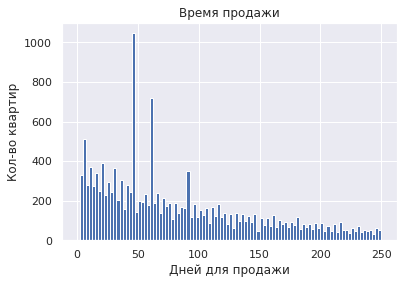

In [69]:
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дней для продажи')
plt.ylabel('Кол-во квартир')
plt.show()

In [70]:
data.query('days_exposition != 9999')['days_exposition'].describe()

count    20387.000000
mean       180.763428
std        219.757256
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод:
В среднем квартира продается за 180 дней, быстрой продажей можем считать продажу в пределах 45 дней.

## Рассчет корреляций

### Подготовка данных:
Исключаем аномальные значения в выборках чтоб избежать некоректного отоброжения информации:

In [71]:
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dataq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dataq
need_help = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in need_help:
    data[col] = quartile_range(data, col)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,publication_day,publication_month,publication_year,cityCenters_nearest_km
count,23558.000000,2.151300e+04,22319.000000,23364.000000,20618.000000,23558.000000,22675.000000,23558.000000,22249.000000,23558.000000,...,23558.000000,8027.000000,23558.000000,9031.000000,19989.000000,2.355800e+04,23558.000000,23558.000000,23558.000000,18058.000000
mean,9.877749,4.837155e+06,54.322887,2.030389,2.631075,10.674718,31.516818,5.877664,9.408134,0.593514,...,0.468758,490.644699,0.589609,518.414572,162.430837,9.938445e+04,2.567451,6.401053,2017.370957,13.696533
std,5.680241,2.215931e+06,19.332467,0.973616,0.081491,6.593003,13.748353,4.871440,3.179140,0.960295,...,0.748348,341.616139,0.883702,277.987564,177.731494,5.028905e+04,1.788331,3.493223,1.037506,8.617630
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,44.000000,7.656300e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,503.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.650000,16.000000,40.581104,8.000000,11.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,217.000000,1.142120e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.186686e+07,114.200000,5.000000,2.850000,60.000000,76.700000,33.000000,19.476423,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.000000


### Рассчет зависиимости цены от факторов:

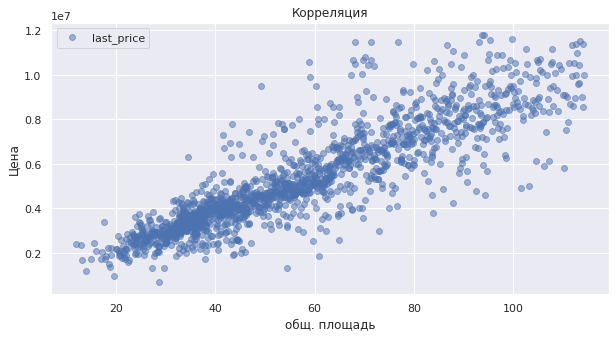

In [72]:
(
data.pivot_table(index='total_area', values='last_price')
.plot(grid=True, style='o', figsize=(10, 5), alpha=0.5)
)
plt.title('Корреляция')
plt.xlabel('общ. площадь')
plt.ylabel('Цена')
plt.show()

In [73]:
print(data['last_price'].corr(data['total_area']))

0.6940772904451614


Вывод: корреляция цены и общей площади присутствут 0.69

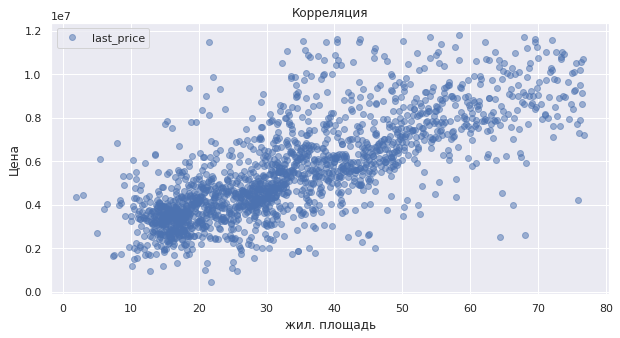

In [74]:
(
data.pivot_table(index='living_area', values='last_price')
.plot(grid=True, style='o', figsize=(10, 5), alpha=0.5)
)
plt.title('Корреляция')
plt.xlabel('жил. площадь')
plt.ylabel('Цена')
plt.show()

In [75]:
print(data['last_price'].corr(data['living_area']))

0.5736054739800109


Вывод: корреляция цены и жилой площади присутствут 0.57

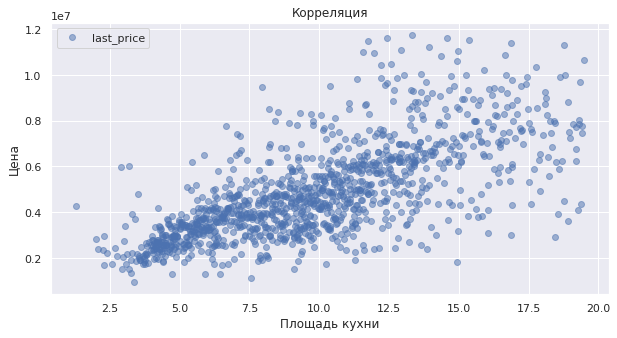

In [76]:
(
data.pivot_table(index='kitchen_area', values='last_price')
.plot(grid=True, style='o', figsize=(10, 5), alpha=0.5)
)
plt.title('Корреляция')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

In [77]:
print(data['last_price'].corr(data['kitchen_area']))

0.5102181542188718


Вывод: корреляция цены и площади кухни присутствут 0.51

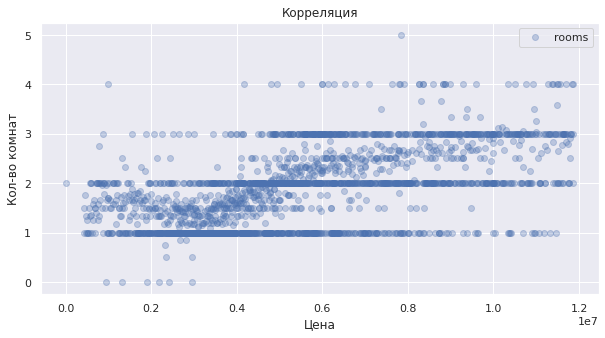

In [78]:
(
data.pivot_table(index='last_price', values='rooms')
.plot(grid=True, style='o', figsize=(10, 5), alpha=0.3)
)
plt.title('Корреляция')
plt.xlabel('Цена')
plt.ylabel('Кол-во комнат')
plt.show()

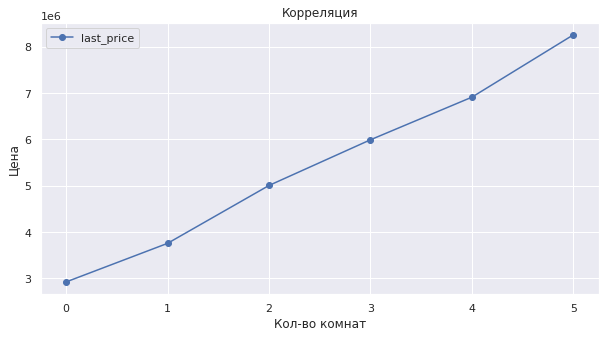

In [79]:
(
data.pivot_table(index='rooms', values='last_price')
.plot(grid=True, style='-o', figsize=(10, 5))
)
plt.title('Корреляция')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show()

In [80]:
data['rooms'].corr(data['last_price'])

0.4489855251225955

Вывод: корреляция цены и кол-ва присутствут 

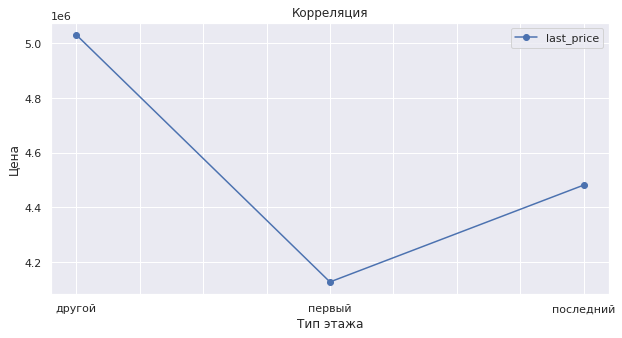

In [81]:
(
data.pivot_table(index='floor_type', values='last_price')
.plot(grid=True, style='-o', figsize=(10, 5))
)
plt.title('Корреляция')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Вывод: Нахождение квартиры не на последнем и не на первом этаже положительно сказывается на цене

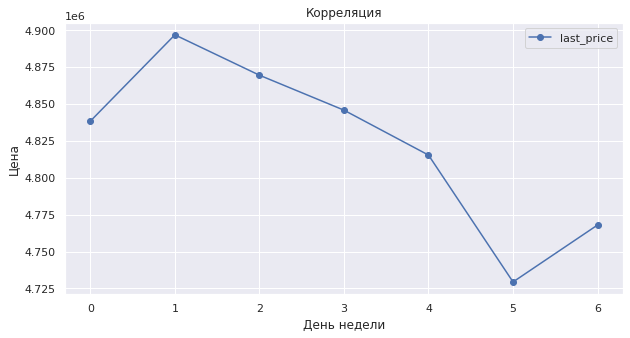

In [82]:
(
data.pivot_table(index='publication_day', values='last_price')
.plot(grid=True, style='-o', figsize=(10, 5))
)
plt.title('Корреляция')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

Небольшая зависимость от дня недели тоже присутствует

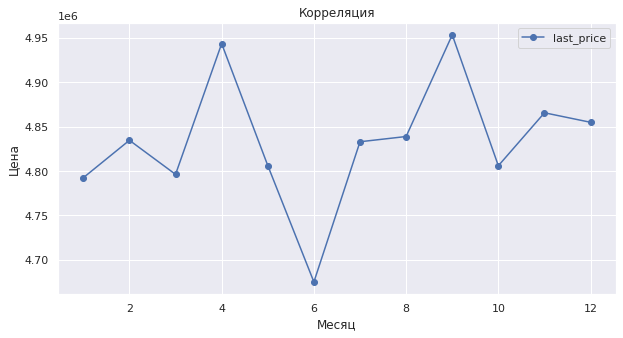

In [83]:
(
data.pivot_table(index='publication_month', values='last_price')
.plot(grid=True, style='-o', figsize=(10, 5))
)
plt.title('Корреляция')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Зависимость цены от месяца имеется ярко выраждены участки с повышением цены в сезоны продаж.

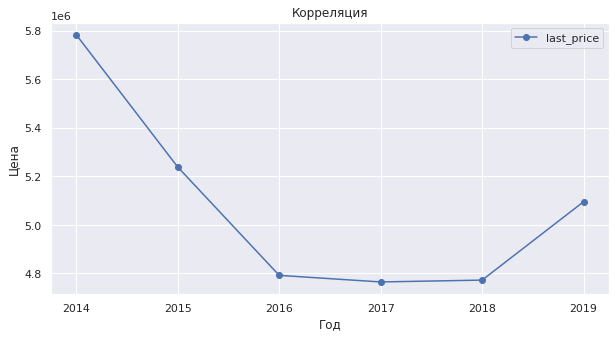

In [84]:
(
data.pivot_table(index='publication_year', values='last_price')
.plot(grid=True, style='-o', figsize=(10, 5))
)
plt.title('Корреляция')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

с 2014 года квартиры дешевели, после 2017 пошли в рост цены.

### Общйи вывод по корреляции:
В среднем квартира продается за 180 дней, быстрой продажей можем считать продажу в пределах 45 дней.

Провели анализ соотношения категорий к цене обекта а именно:
- Общая площадь к цене: корреляция цены и общей площади присутствут 0.69
- Жилая плоощадь к цене: корреляция цены и жилой площади присутствут 0.57
- Площади кухни к цене: корреляция цены и площади кухни присутствут 0.51
- Кол-ва комнат и цены: корреляция цены и кол-ва присутствут 0.44
- Корреляция от типа этажа: нахождение квартиры не на последнем и не на первом этаже положительно сказывается на цене 
- Небольшая зависимость от дня недели тоже присутствует
- Зависимость цены от месяца имеется ярко выраждены участки с повышением цены в сезоны продаж.
- С 2014 года квартиры дешевели, после 2017 пошли в рост цены.

## Расчет стоимости 1 кв.метра в 10 самых популярных населенных пунктах

### Расчет
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [85]:
city_ten = data['locality_name'].value_counts().head(10)
city_price_one_meter_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_one_meter', index='locality_name')
city_price_one_meter_price= city_price_one_meter_price.astype(int)
city_price_one_meter_price.sort_values('price_one_meter', ascending=False)

,price_one_meter
locality_name,
Санкт-Петербург,114838
Пушкин,103125
посёлок Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85629
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


### Вывод:
Наибольшая средняя стоимость квадратного метра, в Санкт-Петербурге. Затем идёт Пушкин, что вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом. Из рассмотренных нами наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

##  Стоимость 1 км при приблежению к центру

### Расчет и график

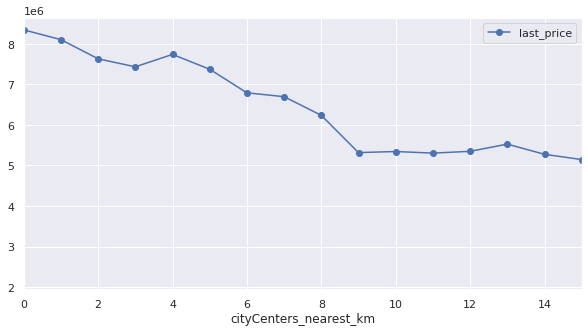

In [86]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

### Вывод:
По представленному графику мы видим что средняя цена за квартиру увеличивается чем ближе она к центру города.

## Общий вывод

Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

План предобработке:
- Фильтрация и очистка данных от ошибок и дубликатов
- Нормализация данных для удобства анализа
- Определение рыночной стоимости недвижимости с помощью методов оценки

Предобработка данных:

Необходимые действия:
1. Собрать данные из различных источников, таких как сайты объявлений о недвижимости, государственные базы данных и т.д.
2. Провести предварительную обработку данных, включая удаление дубликатов, проверку на ошибки и преобразование в единый формат.
3. Разделить данные.
4. Использовать статистические методы, такие как корреляционный анализ, регрессионный анализ и кластерный анализ, для выявления закономерностей и связей между различными параметрами недвижимости.


Общий вывод по предобработке:
- Изменили тип данных либо формат записи по столбцам: Последняя цена, День выставления обьявления
- Удалили пропуски в колонке итого этажей
- Всего колонок с пропущенными значениями 12
- Заменили количество пропущенных балконов на ноль, можем связать отсутствие этих значением с тем что люди без балкона, не обращали внимание на данный пункт
- Заполнили, пропуски в столбце аппартаменты. Можем предположить что человек не обращал внимание на аппартаменты если его квартира не относилась к ним.
- Обратили внимание на значения которые явно указанны не в тех единицах измерения, преведем к единообразию, отбросим те значения что выбиваются из нормы
- В столбце с именем локации, были неявные дубликаты, привели к единообразию названий
- Заполнели отсутствующие значения медианным соотношением необх.площади к общей
- Пропущеные значения в кол-ве парков в радиусе 3-ех км и прудов заполняем 0 значвениями


Общий вывод по добавлениям новых столбцов:
- Добавили в таблицу столбцы День, Месяц, Год публикации
- Добавили в таблицу столбец с категорией по этажам
- Добавили в таблицу столбец растояние до центра в км


Общий вывод по кол-ву публикаций:
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью от 40 до 50 кв.м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с площадью кухни  по 7, 9, 10 метров.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с жилой площадью около 18 кв.м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры по цене примерно в 3-3,3 миллиона рублей.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с высотой потолка 2,65 м.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры формата 1-ой и 2-ух комнатных.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры с 1-го по 4-ый этаж
- Самыми широкопредставленными обьявлениями о продаже являются квартиры не представленые на 1 и последнем этажах
- Самыми широкопредставленными обьявлениями о продаже являются квартиры в 5-ти этажных домах.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры со средней удаленостью 15 км от центра города.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры удаленные от аэропорта на растояние 25,33 км.
- Самыми широкопредставленными обьявлениями о продаже являются квартиры около которых есть парки, растояние составит приерно 500 метров.
- Наиболее активно публикации обьявлений происходят в буднии дни
- Наибольшая активность по публикация обьявлений является раняя  весна и ноябрь 


В среднем квартира продается за 180 дней, быстрой продажей можем считать продажу в пределах 45 дней.


В среднем квартира продается за 180 дней, быстрой продажей можем считать продажу в пределах 45 дней.

Провели анализ соотношения категорий к цене обекта а именно:
- Общая площадь к цене: корреляция цены и общей площади присутствут 0.69
- Жилая плоощадь к цене: корреляция цены и жилой площади присутствут 0.57
- Площади кухни к цене: корреляция цены и площади кухни присутствут 0.51
- Кол-ва комнат и цены: корреляция цены и кол-ва присутствут 0.44
- Корреляция от типа этажа: нахождение квартиры не на последнем и не на первом этаже положительно сказывается на цене 
- Небольшая зависимость от дня недели тоже присутствует
- Зависимость цены от месяца имеется ярко выраждены участки с повышением цены в сезоны продаж.
- С 2014 года квартиры дешевели, после 2017 пошли в рост цены.


Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

Наибольшая средняя стоимость квадратного метра, в Санкт-Петербурге. Затем идёт Пушкин, что вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом. Из рассмотренных нами наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

Опишите, как стоимость объектов зависит от расстояния до центра города.:

Средняя цена за квартиру увеличивается чем ближе она к центру города.

Рекомендации:

1. Добавить мониторинг просмотра обьявлений по дням неделям.
2. Кол-ва просмотров обьявлений с даты публикации.
3. В зависимости от предыдуших двух пунктов, можно рассмотреть если допустим показатели просмотра в вск и субботу большие, а как мы поняли из анализа в эти дни меньше всего появляются новые обьявления, промотивировать клиентов выкладывать обьявления в эти дни предоставляю промокод или скидку на продвижение.
4. Можно добавитьь статиску роста цены в  процентах, чтоб  человеку при просмотре обьявления было легче пойти на покупку, в случае если цены все время росли и продолжают. Если человек примет решения основываясь на данной метрике, в дальнейшем скорее всего расскажет друзьям почему именно в этот момент он купил квартиру, что в теории может привести к большей конверсии покупок и посещений сайта.